# Data augmentation

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
#export
from exp.nb_09c import *

## PIL transforms

### View images

In [4]:
#export
make_rgb._order = 0

In [5]:
path = datasets.untar_data(datasets.URLs.IMAGENETTE)

In [6]:
tfms = [make_rgb, ResizeFixed(128), to_byte_tensor, to_float_tensor]

In [7]:
def get_il(tfms): return ImageList.from_files(path, tfms=tfms)

In [8]:
il = get_il(tfms)

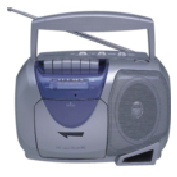

In [109]:
show_image(il[4060])

In [110]:
img = PIL.Image.open(il.items[4060])

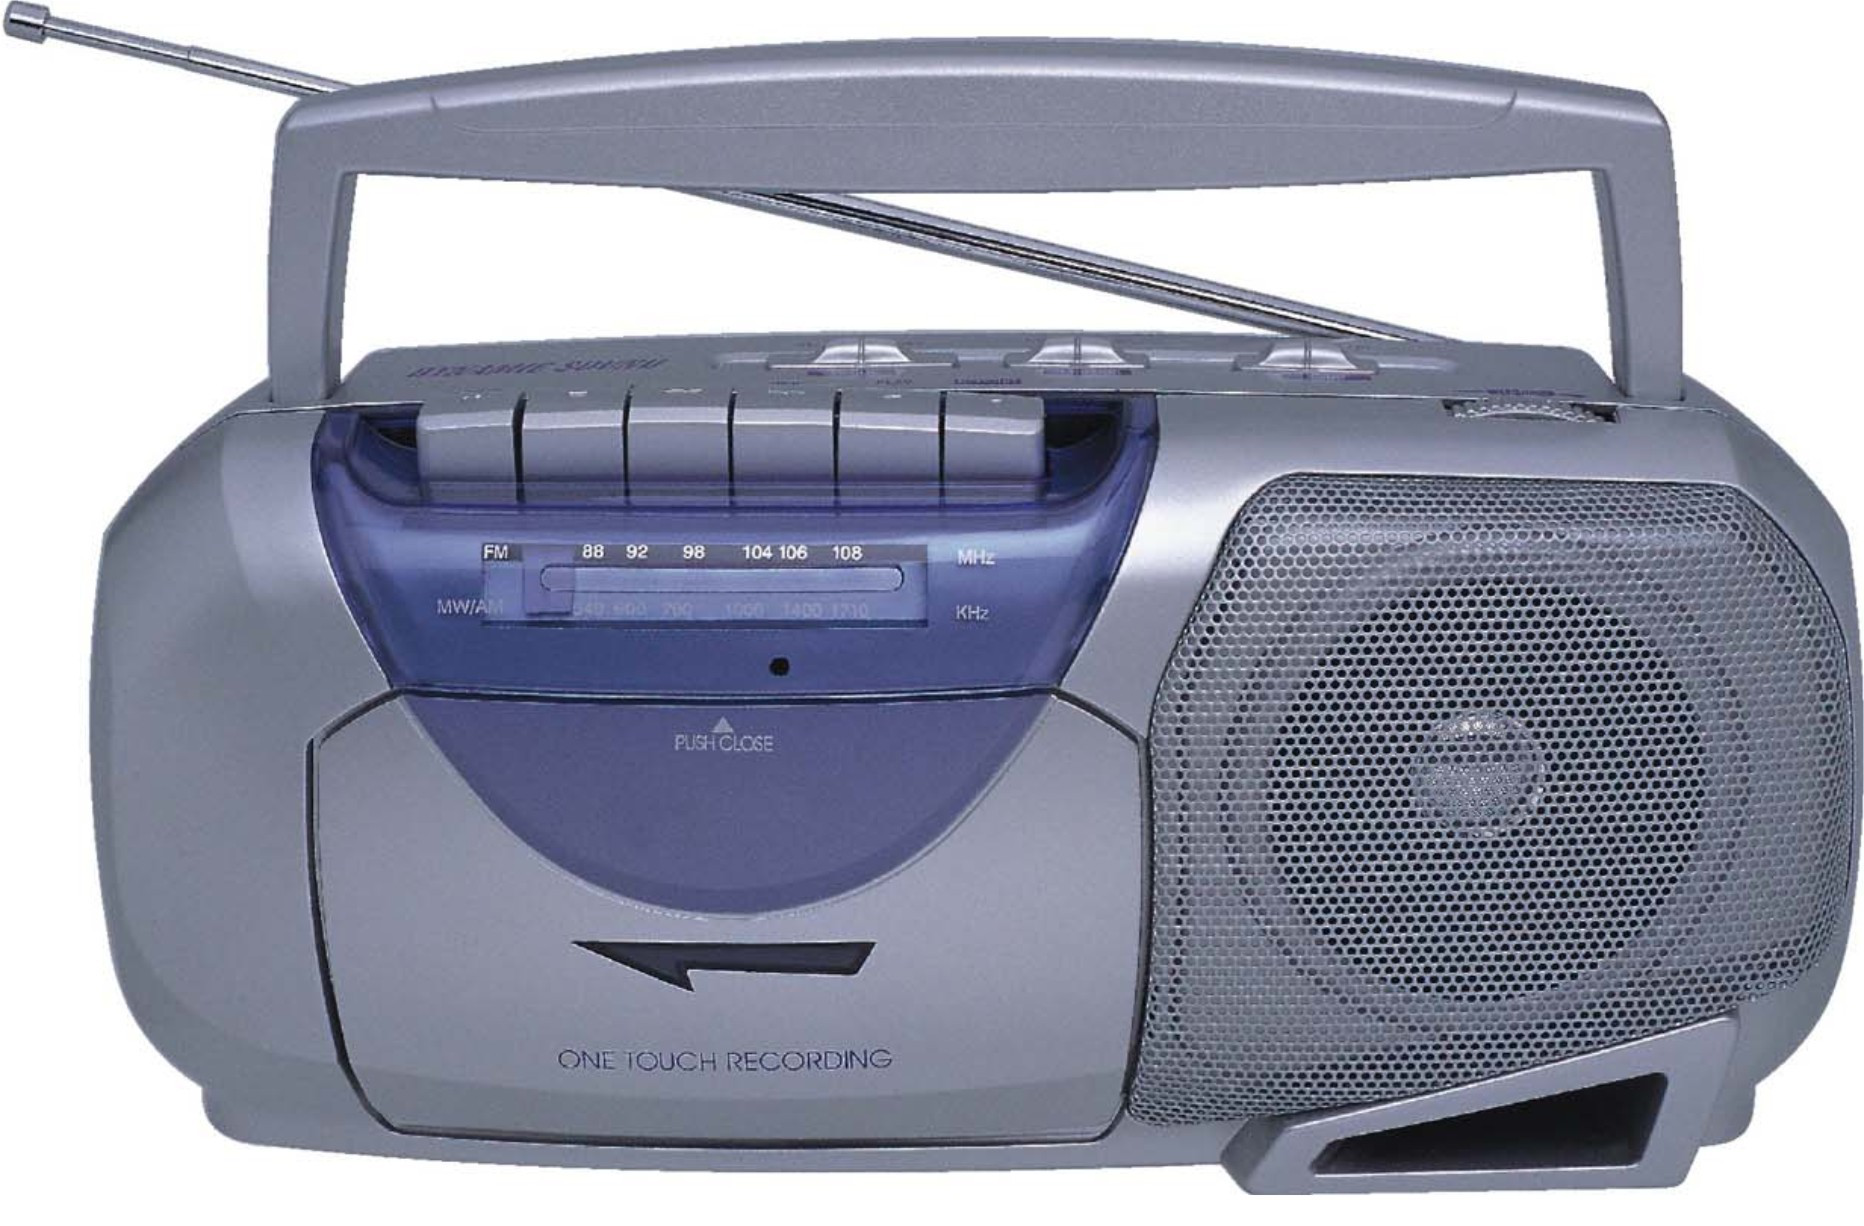

In [111]:
img

In [112]:
img.getpixel((1,1))

(248, 248, 250)

In [113]:
import numpy as np

In [114]:
%timeit -n 10 a = np.array(PIL.Image.open(il.items[0]))

3.61 ms ± 175 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Be careful of resampling methods, you can quickly lose some textures!

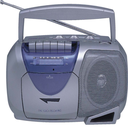

In [115]:
img.resize((128,128), resample=PIL.Image.ANTIALIAS)

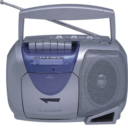

In [116]:
img.resize((128,128), resample=PIL.Image.BILINEAR)

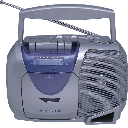

In [117]:
img.resize((128,128), resample=PIL.Image.NEAREST)

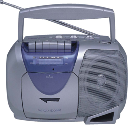

In [119]:
img.resize((256,256), resample=PIL.Image.BICUBIC).resize((128,128), resample=PIL.Image.NEAREST)

In [120]:
%timeit img.resize((224,224), resample=PIL.Image.BICUBIC)

12.3 ms ± 61.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [121]:
%timeit img.resize((224,224), resample=PIL.Image.BILINEAR)

6.94 ms ± 1.12 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [122]:
%timeit img.resize((224,224), resample=PIL.Image.ANTIALIAS)

18.1 ms ± 2.57 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [123]:
%timeit img.resize((224,224), resample=PIL.Image.NEAREST)

58.8 µs ± 16.3 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Flip

In [124]:
#export
import random

In [125]:
def pil_random_flip(x):
    return x.transpose(PIL.Image.FLIP_LEFT_RIGHT) if random.random() < 0.5 else x

In [128]:
ill = get_il(tfms)

In [129]:
ill.items = [ill.items[0]] * 64

In [130]:
dl = DataLoader(ill, 8)

In [131]:
x = next(iter(dl))

In [152]:
#export
def show_image(im, ax=None, figsize=(3,3)):
    if ax is None: _, ax = plt.subplots(1, 1, figsize=figsize)
    ax.axis('off')
    ax.imshow(im.permute(1,2,0))
    
def show_batch(x, c=4, r=None, figsize=None):
    n = len(x)
    if r is None: r = int(math.ceil(n/c))
    if figsize is None: figsize=(c*3, r*3)
    fig, axes = plt.subplots(r, c, figsize=figsize)
    for xi, ax in zip(x, axes.flat): show_image(xi, ax)

Without data augmentation:

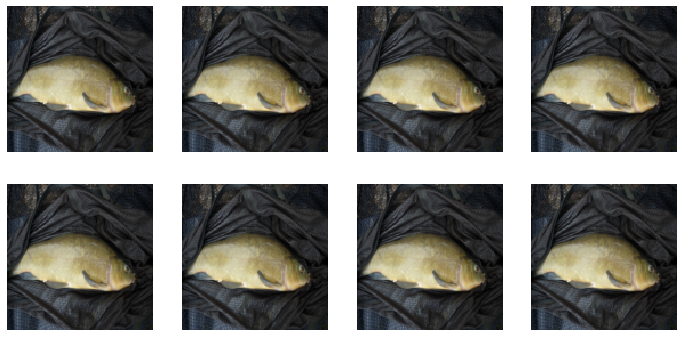

In [153]:
show_batch(x)

Random flip:

In [155]:
ill.tfms.append(pil_random_flip)

In [156]:
x = next(iter(dl))

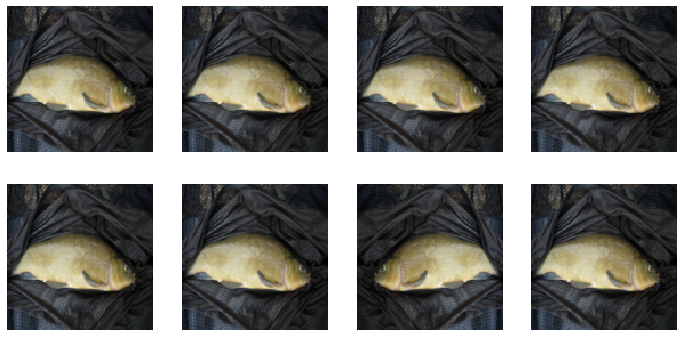

In [157]:
show_batch(x)

In [168]:
??ImageList._get